1. 라이브러리 설치

In [ ]:
!pip install --upgrade google.cloud.aiplatform

In [ ]:
import IPython

app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

2. 환경 변수 설정

In [ ]:
import vertexai

PROJECT_ID = !gcloud config get-value project
PROJECT_ID = PROJECT_ID[0]
REGION = "us-east1"

vertexai.init(project=PROJECT_ID, location=REGION)

3. 모델 생성

In [ ]:
from vertexai.generative_models import GenerativeModel

In [ ]:
# model_version=1.0
model_version=1.5
model = GenerativeModel(f"gemini-{model_version}-pro")

4. few shot

4.1 Text few-shot

In [ ]:
content="""
다음 메시지에 대해 긍정, 부정, 중립 으로 구분하시오
메세지 : 나는 니가 만든 유투브 비디오를 너무 좋아해
"""

In [ ]:
response = model.generate_content(content)
print(response.text)

메세지 **"나는 니가 만든 유투브 비디오를 너무 좋아해"** 는 명확하게 **긍정적인** 메시지입니다. 😊 칭찬과 호감을 담고 있습니다. 



In [ ]:
content="""
다음 메시지에 대해 긍정, 부정, 중립 으로 구분하시오
메세지 : 나는 니가 만든 유투브 비디오를 너무 좋아해
감정 : 긍정
메세지 : 이건 뭐지, 너무 지루해
"""

In [ ]:
response = model.generate_content(content)
print(response.text)

감정 : **부정** 



In [ ]:
content="""
다음 메시지에 대해 긍정, 부정, 중립 으로 구분하시오
메세지 : 나는 니가 만든 유투브 비디오를 너무 좋아해
감정 : 긍정
메세지 : 이건 뭐지, 너무 지루해
감정 : 부정
메세지 : 이 영상은 영화 예고편이다
"""

In [ ]:
response = model.generate_content(content)
print(response.text)

감정 : 중립 



4.2 Image few-shot

In [ ]:
import urllib.request
from vertexai.generative_models import Image

def load_image_from_url(url):
    with urllib.request.urlopen(url) as web_file:
      img = web_file.read()
    return Image.from_bytes(img)

In [ ]:
image1_url = "https://storage.googleapis.com/github-repo/img/gemini/intro/landmark1.jpg"
image2_url = "https://storage.googleapis.com/github-repo/img/gemini/intro/landmark2.jpg"
image3_url = "https://storage.googleapis.com/github-repo/img/gemini/intro/landmark3.jpg"
image1 = load_image_from_url(image1_url)
image2 = load_image_from_url(image2_url)
image3 = load_image_from_url(image3_url)

In [ ]:
prompt="이미지를 도시와 랜드마크 이름으로 구분해줘"
content=[image1, prompt]

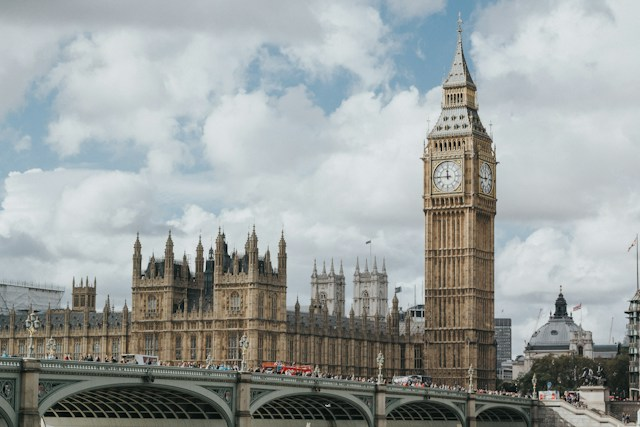

이미지에는 런던과 랜드마크인 빅벤이 나와 있습니다. 


In [ ]:
from IPython.display import display

response = model.generate_content(content)
display(image1)
print(response.text)

In [ ]:
prompt = """
  {"도시": "런던", "랜드마크:", "엘리자베스 타워(빅 벤)"}
"""
content=[image1, prompt, image2]

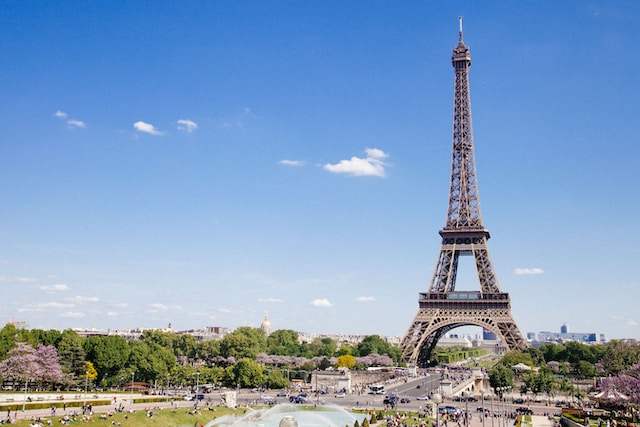

{"도시": "파리", "랜드마크": "에펠탑"}


In [ ]:
response = model.generate_content(content)
display(image2)
print(response.text)